EDA - Medical Insurance Cost data

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os

1. DATA COLLECTION

In [40]:
df = pd.read_csv("../data/raw/df_raw.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. EXPLORE & CLEAN DATA

In [41]:
# 2.1: DIMENSIONS ➞ (rows, columns)
df.shape

(1338, 7)

In [42]:
# 2.2: DATA TYPES & NON-NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
# TRANSFORM 'UNKNOWN' AND 'NONEXISTENT' IN NaN → TO FILL THEM IN AND ENABLE PROCESSING
df.replace(['unknown', 'nonexistent'], np.nan, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [45]:
# 2.3: FIND & DELETE DUPLICATES
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# TRANSFORM 'UNKNOWN' AND 'NONEXISTENT' IN NaN → TO FILL THEM IN AND ENABLE PROCESSING
df.replace(['unknown', 'nonexistent'], np.nan, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [47]:
df.isna().sum()[df.isna().sum()]

/tmp/ipykernel_694/2095151754.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.isna().sum()[df.isna().sum()]


age    0
age    0
age    0
age    0
age    0
age    0
age    0
dtype: int64

In [48]:
# 2.4: DELETE IRRELEVANT INFO. & DEAL WITH NA VALUES
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

3. UNIVARIATE VARIABLE ANALYSIS

3.1. DIVE DATASET INTO CATEGORICAL AND NUMERICAL

In [50]:
# FEATURE TYPES
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [51]:
# DIVIDE DF BY NUMERICAL AND CATEGORICAL
num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

In [52]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


3.2. CATEGORICAL VARIABLE ANALYSIS

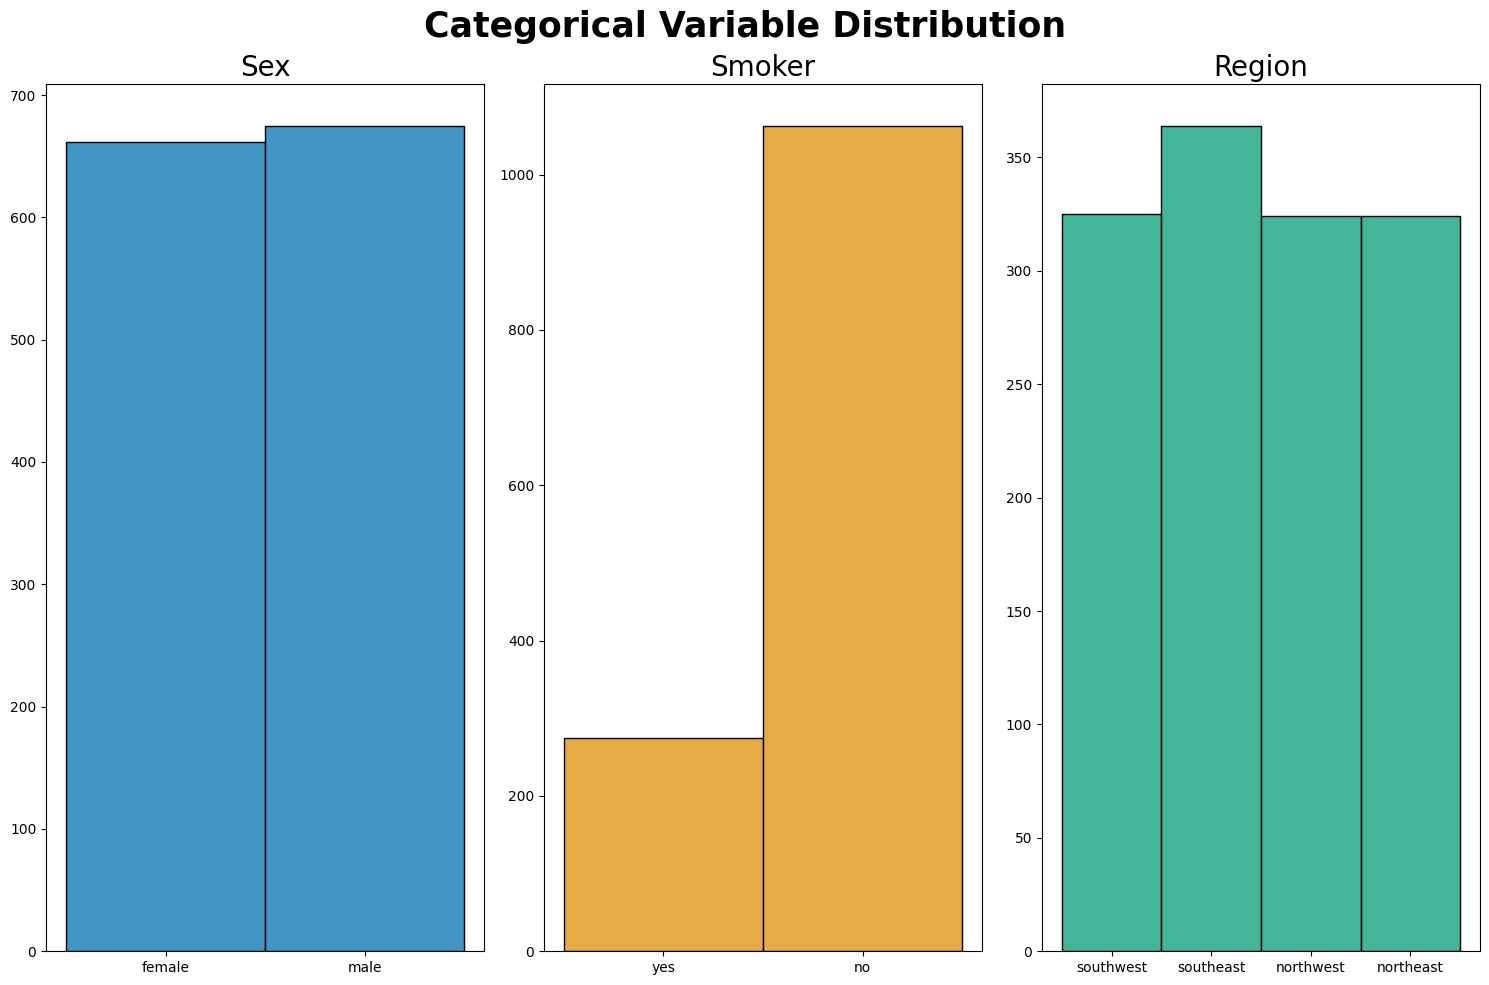

In [53]:
fig, axis = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle("Categorical Variable Distribution", fontsize=25, fontweight='bold')

categories = [
    ("sex", 0, 0),
    ("smoker", 0, 1),
    ("region", 0, 2),    
]

for i, (col, row, col_pos) in enumerate(categories):
    ax = axis[col_pos]
    sns.histplot(data=df_cat, x=col, ax=ax, color=sns.color_palette("colorblind")[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=20)

plt.tight_layout()
plt.show()

<Axes: xlabel='region', ylabel='charges'>

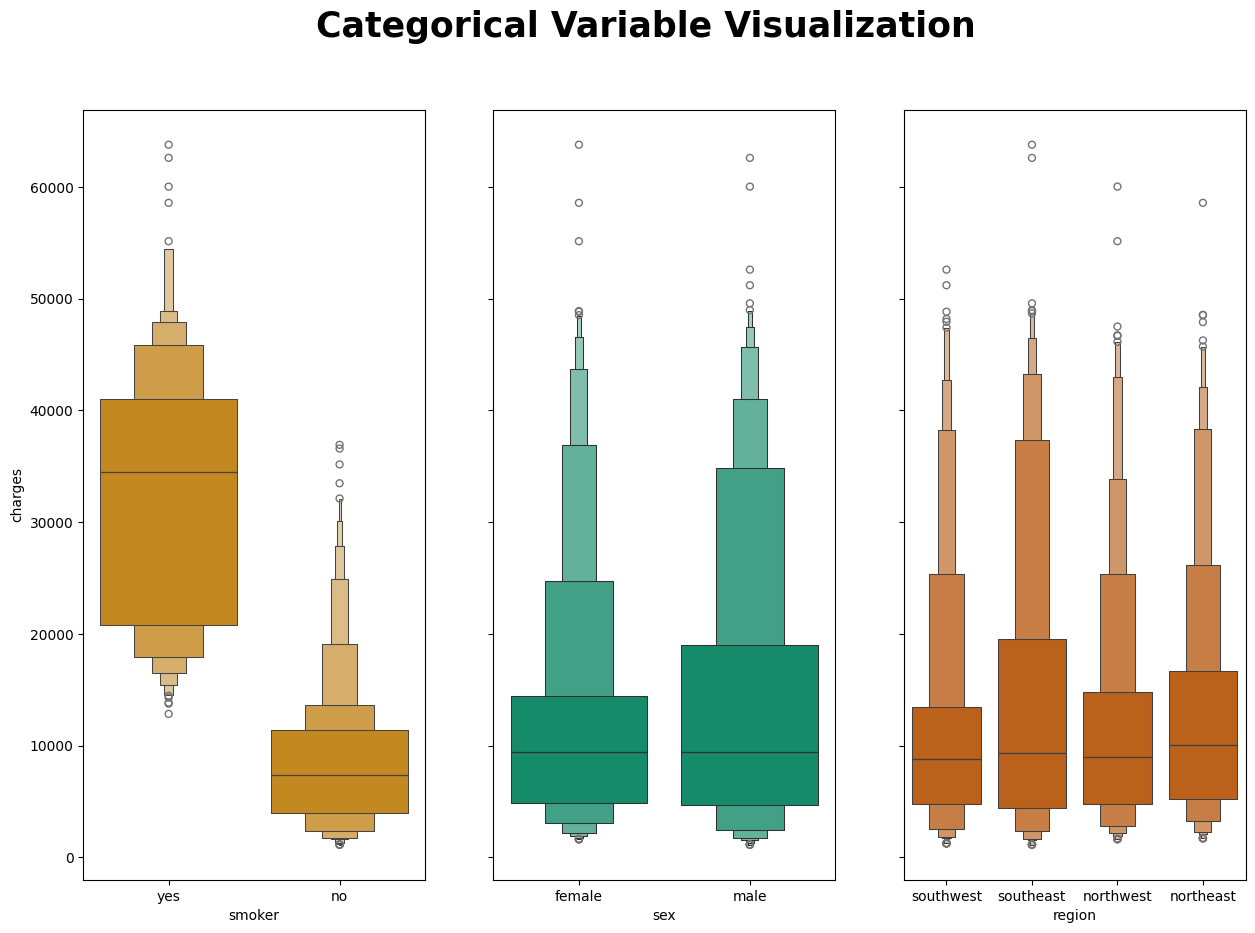

In [54]:
fig, axis = plt.subplots(1,3, figsize=(15,10), sharey=True)
fig.suptitle('Categorical Variable Visualization', fontsize=25, fontweight='bold')

sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axis[0], color=sns.color_palette("colorblind")[1])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axis[1], color=sns.color_palette("colorblind")[2])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axis[2], color=sns.color_palette("colorblind")[3])

3.3. NUMERICAL VARIABLE ANALYSIS

In [55]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


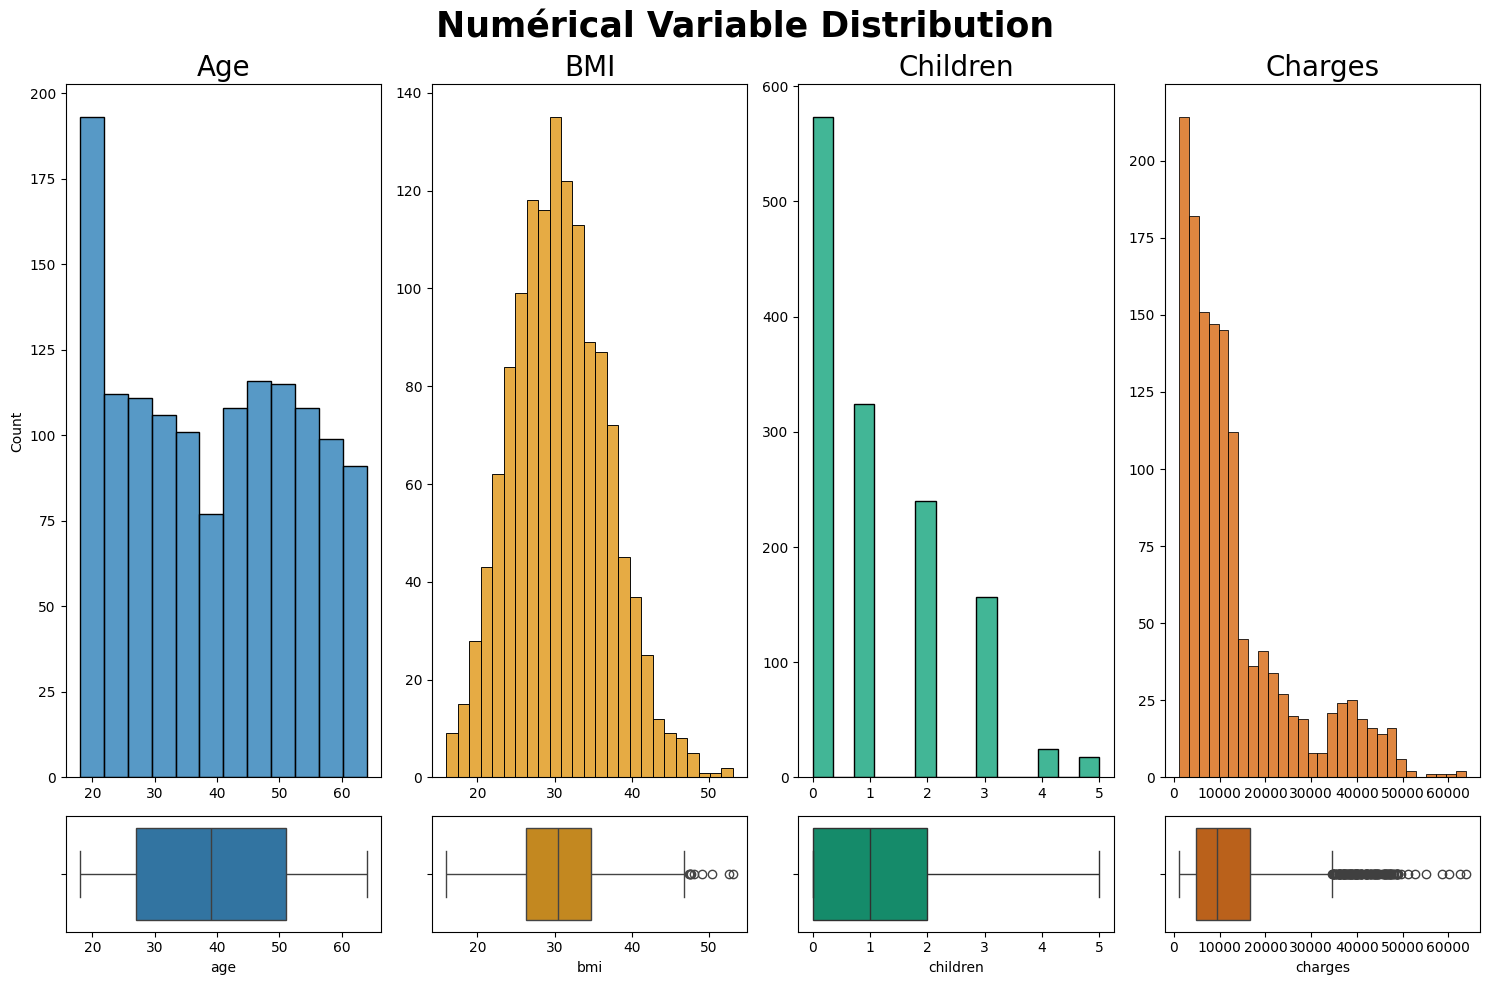

In [56]:
fig, axis = plt.subplots(2, 4, figsize = (15, 10), gridspec_kw = {"height_ratios": [6, 1]})
fig.suptitle("Numérical Variable Distribution", fontsize=25, fontweight='bold')

sns.histplot(ax = axis[0, 0], data = df_num, x = "age").set(xlabel = None)
axis[0, 0].set_title("Age", fontsize=20)
sns.boxplot(ax = axis[1, 0], data = df_num, x = "age")
axis[0, 1].set_title("BMI", fontsize=20)

sns.histplot(ax = axis[0, 1], data = df_num, x = "bmi", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "bmi", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num, x = "children", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
axis[0, 2].set_title("Children", fontsize=20)
sns.boxplot(ax = axis[1, 2], data = df_num, x = "children", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = df_num, x = "charges", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
axis[0, 3].set_title("Charges", fontsize=20)
sns.boxplot(ax = axis[1, 3], data = df_num, x = "charges", color=sns.color_palette("colorblind")[3])

plt.tight_layout()
plt.show()

4. MULTIVARIATE VARIABLE ANALYSIS

4.1. CATEGORICAL-NUMERICAL VARIABLE ANALYSIS